<a href="https://colab.research.google.com/github/pooja614/ML_DL_projects/blob/main/Weather_Recognition_Sequential_Model_(78_Test_Accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Computer Vision_project 
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import glob
import pandas as pd 
import seaborn as sns 
import tensorflow as tf                 
import PIL                             
import PIL.Image       
import numpy as np 

In [ ]:
# Load the dataset from kaggle

os.environ['KAGGLE_USERNAME'] = 'pkpbam'  
os.environ['KAGGLE_KEY'] = '3de4136ab536ed90dc2aabdf917dbc1c' 
# !kaggle datasets download -d jehanbhathena/weather-dataset

 99% 578M/587M [00:05<00:00, 163MB/s]
100% 587M/587M [00:06<00:00, 102MB/s]


### Steps now:
* unzip folder
* Load and do basic EDA 
* image dataset from directory


In [ ]:
# how many images in each folder
img_path = '/content/drive/MyDrive/Projects/weather_recognition/dataset'

for dirpath, dirnames, filenames in os.walk(img_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 11 directories and 0 images in '/content/drive/MyDrive/Projects/weather_recognition/dataset'.
There are 0 directories and 698 images in '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew'.
There are 0 directories and 851 images in '/content/drive/MyDrive/Projects/weather_recognition/dataset/fogsmog'.
There are 0 directories and 475 images in '/content/drive/MyDrive/Projects/weather_recognition/dataset/frost'.
There are 0 directories and 639 images in '/content/drive/MyDrive/Projects/weather_recognition/dataset/glaze'.
There are 0 directories and 591 images in '/content/drive/MyDrive/Projects/weather_recognition/dataset/hail'.
There are 0 directories and 377 images in '/content/drive/MyDrive/Projects/weather_recognition/dataset/lightning'.
There are 0 directories and 526 images in '/content/drive/MyDrive/Projects/weather_recognition/dataset/rain'.
There are 0 directories and 232 images in '/content/drive/MyDrive/Projects/weather_recognition/dataset/rainbow'.
Ther

In [ ]:
# import zipfile 
# zip_path = '/content/drive/MyDrive/Projects/weather_recognition/weather-dataset.zip'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:                              
#   zip_ref.extractall('/content/drive/MyDrive/Projects/weather_recognition/')

In [ ]:
path_imgs = list(glob.glob(img_path + '/**/*.jpg'))          
path_imgs[:10] 

['/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2208.jpg',
 '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2209.jpg',
 '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2210.jpg',
 '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2211.jpg',
 '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2212.jpg',
 '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2213.jpg',
 '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2214.jpg',
 '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2215.jpg',
 '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2216.jpg',
 '/content/drive/MyDrive/Projects/weather_recognition/dataset/dew/2217.jpg']

In [ ]:
# Extract the sample to visualize
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_imgs)) 
file_path = pd.Series(path_imgs, name = 'File_Path').astype(str)
labels = pd.Series(labels, name= 'Labels')
df = pd.concat([file_path, labels], axis = 1)
df = df.sample(frac = 1, random_state = 42).reset_index(drop = True) 
df.head()                                                            

,File_Path,Labels
0,/content/drive/MyDrive/Projects/weather_recogn...,sandstorm
1,/content/drive/MyDrive/Projects/weather_recogn...,frost
2,/content/drive/MyDrive/Projects/weather_recogn...,hail
3,/content/drive/MyDrive/Projects/weather_recogn...,snow
4,/content/drive/MyDrive/Projects/weather_recogn...,dew


## EDA and Visualization

In [ ]:
img = PIL.Image.open(path_imgs[5])
wid, hgt = img.size
print(wid, hgt)                     

500 411


In [ ]:
# shape                                
df.shape, df['Labels'].unique()      

((6862, 2),
 array(['lightning', 'fogsmog', 'rime', 'dew', 'frost', 'rain', 'rainbow',
        'hail', 'glaze', 'sandstorm', 'snow'], dtype=object))

In [ ]:
df['Labels'].value_counts()

rime         1160
fogsmog       851
dew           698
sandstorm     692
glaze         639
snow          621
hail          591
rain          526
frost         475
lightning     377
rainbow       232
Name: Labels, dtype: int64

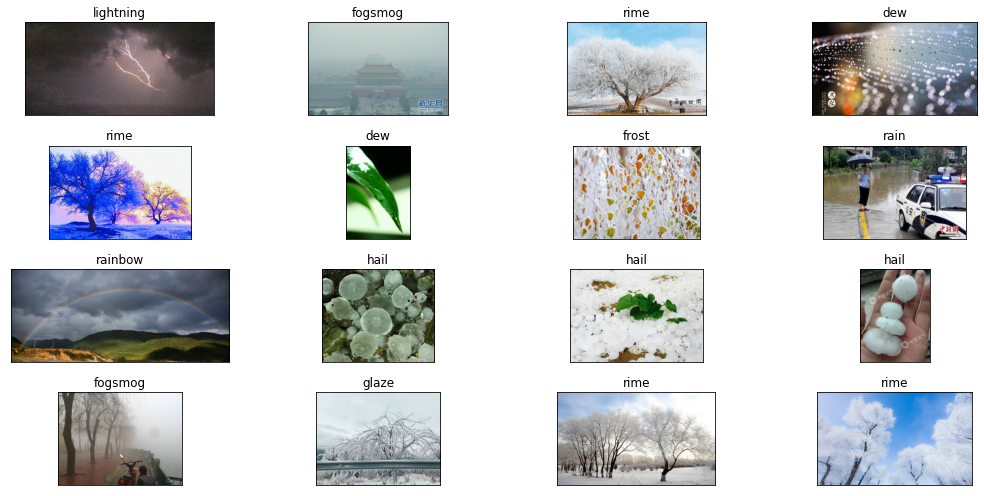

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols = 4, figsize=(15,7),
subplot_kw = {'xticks':[], 'yticks': []} )
for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(df.File_Path[i]))
  ax.set_title(df.Labels[i])
plt.show()                       

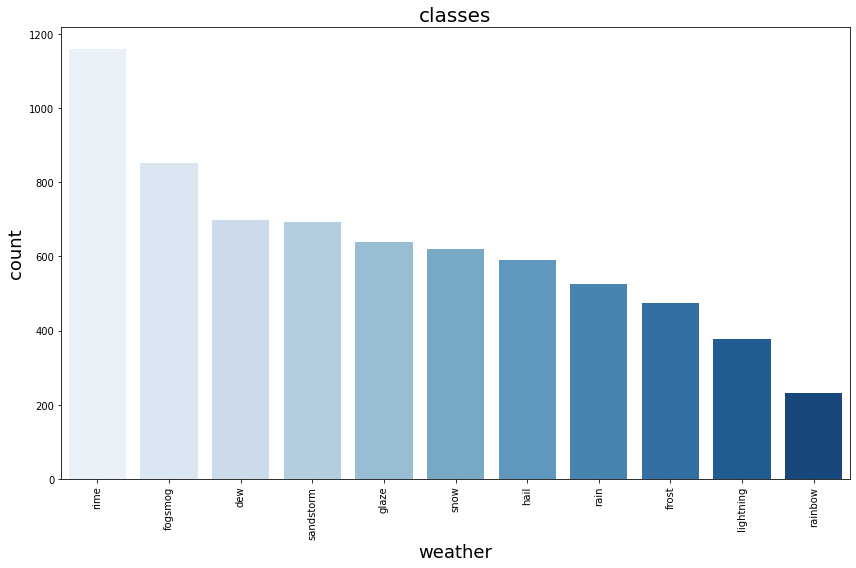

In [ ]:
# bar plot of the  images
df_count = df['Labels'].value_counts()
df_count.index

def barplot(a,b, title, x_label, y_label, palet):
  plt.figure(figsize=(12,8))
  sns.barplot(x = a, y = b, palette =palet, order=a)
  plt.xticks(rotation = 90)
  plt.title(title, fontsize = 20)
  plt.xlabel(x_label, fontsize = 18)
  plt.ylabel(y_label, fontsize = 18)
                
barplot(df_count.index, df_count.values, 'classes','weather', 'count', 'Blues')

## Steps:
* Find unique label values
* Turn every label into boolean array
* Turn boolean array into integers


https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

# Do Later 

In [ ]:
# loading the dataset
img_path = '/content/drive/MyDrive/Projects/weather_recognition/dataset'

# split to train, test and validation set 
batch = 32
IMG_SHAPE = (224,224) 
SEED = 123
# img_path                                                                               
train_ds = tf.keras.utils.image_dataset_from_directory(
    img_path,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SHAPE,
    validation_split = 0.35,
    batch_size = batch,
    shuffle = True,                              
    subset = 'training'
    
) 

test_ds = tf.keras.utils.image_dataset_from_directory(
    img_path,
    label_mode = 'categorical',
    seed = SEED,
    image_size = IMG_SHAPE,
    validation_split = 0.15,
    batch_size = batch,
    shuffle = True,                              
    subset = 'validation'
    
) 

val_ds = tf.keras.utils.image_dataset_from_directory(
    img_path,
    label_mode = 'categorical',
    image_size = IMG_SHAPE,
    validation_split = 0.2,
    batch_size = batch,
    shuffle = True,
    seed = SEED,
    subset = 'validation'

)  

class_names = train_ds.class_names
print( f" class names{class_names}") 

# for images_batch, labels_batch in train_ds:
#   print(f"image batch shape {images_batch.shape} ")    
#   print(f"labels_batch.shape {labels_batch.shape}") 

# methods while loading the data 
AUTOTUNE = tf.data.AUTOTUNE
train_ds  = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE) 

# preprocess the train data


Found 6862 files belonging to 11 classes.
Using 4461 files for training.
Found 6862 files belonging to 11 classes.
Using 1029 files for validation.
Found 6862 files belonging to 11 classes.
Using 1372 files for validation.
 class names['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


## Configure the dataset for performance

https://www.tensorflow.org/tutorials/images/classification 

https://www.tensorflow.org/tutorials/load_data/images  


These are two important methods you should use when loading data:

Dataset.cache
*  keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
Dataset.prefetch 
* overlaps data preprocessing and model execution while training.
* the tf.data API guide.https://www.tensorflow.org/guide/data_performance 

In [ ]:
num_classes = len(class_names)

In [ ]:
# Important Functions
import tensorflow as tf 
from tensorflow import keras 
from keras import layers 
from keras.models import Sequential    
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub
import datetime  

folder_path = '/content/drive/MyDrive/Projects/weather_recognition/' 

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = folder_path + dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback  = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving tensorBoard log files to: {log_dir}") 
  
  # Early Stopping     
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)

  # Check point callback
  checkpoint_path = folder_path + 'checkpoints_weights/checkpoint.ckpt'
  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                   save_weights_only = True,
                                   save_best_only = False ,
                                   save_freq = 'epoch',
                                   verbose = 1
                                   ) 

  return [callback, tensorboard_callback , checkpoint_callback] 

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss 
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy') 
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();            


def create_model(model_url, num_classes):
  """
  Takes a tensorFlow Hub and creates a Keras Sequential model with it. 
  Args:
  model_url(str): A Tensorflow Hub feature extraction URL. 

  Returns:
  An uncompiled Keras Sequential model with model_url as feature extractor layer
  and Dense output layer with num_classes output neurons. 

  """

  # Download the pretained model and save as keras layer
  feature_extraction_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_Extraction_layer",
                                           input_shape =IMG_SHAPE + (3,)) 
  
  # Create our own model
  model = tf.keras.Sequential([ 
      layers.Rescaling(1./255,input_shape=(224,224,3)),
      feature_extraction_layer,
      layers.Dense(num_classes, activation='softmax', name = 'output_layer')
  ]) 

  return model

def convolutional_model(num_classes, input_shape_):
  input_img = tf.keras.Input(shape=input_shape_)
  x = tf.keras.layers.Rescaling(1./255, input_shape= input_shape_)(input_img)
  Z1 = tf.keras.layers.Conv2D(filters =32,
                              kernel_size=(3,3),
                              strides =(1,1),
                              input_shape=input_shape_,
                              padding='valid',
                              activation='relu')(x)
  P1 = tf.keras.layers.MaxPool2D()(Z1)
  Z2 = tf.keras.layers.Conv2D(filters =32,
                              kernel_size=(3,3),
                              strides =(1,1),
                              padding='valid',
                              activation='relu')(P1)
  P2 = tf.keras.layers.MaxPool2D()(Z2) 
  Z3 = tf.keras.layers.Conv2D(filters =64,
                              kernel_size=(3,3),
                              strides =(1,1),
                              padding='valid',
                              activation='relu')(P2)                       
  P3 = tf.keras.layers.MaxPool2D()(Z3) 
  Z4 = tf.keras.layers.Conv2D(filters =16,
                              kernel_size=(3,3),
                              strides =(1,1),
                              padding='valid',
                              activation='relu')(P3)
  P4 = tf.keras.layers.MaxPool2D()(Z4)
  
  F = tf.keras.layers.Flatten()(P4) 
  outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(F)
  model = tf.keras.Model(inputs=input_img, outputs=outputs)
  return model 


# Compile and fit model 
def compile_model(model):
  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']) 
  
  return model
def fit_model(model, model_name):
  m_history=model.fit(train_ds,
              epochs=50,
              steps_per_epoch = len(train_ds),
              validation_data=test_ds,
              validation_steps=len(test_ds),
              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                      experiment_name=model_name)]) 
  plot_loss_curves(m_history)


In [ ]:

# Number of classes
num_classes = len(class_names)

# Initialise different models to experiment
resnet50_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
resnet_model = create_model(resnet50_url,
                            len(class_names)) 

mobilenet_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobilenet_model = create_model(mobilenet_url,
                            len(class_names))

seq_model = Sequential([
    layers.Rescaling(1./255, input_shape=(224,224,3)),
    layers.Conv2D(32, 3,1,                       
                  input_shape=(224,224, 3),
                  padding = 'valid',
                  activation = 'relu',
                 ),
    layers. Conv2D(32, 3, activation = "relu"),
    layers.MaxPool2D(),
    layers.Conv2D(64,3, padding = 'valid', activation='relu'),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(len(class_names), activation='softmax') 
]) 

efficient_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1' 
efficientnet_model = create_model(efficient_url,
                            len(class_names))


conv_model_3 = convolutional_model(len(class_names),input_shape_= IMG_SHAPE + (3,))

Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/resnet50/20220813-085754
Epoch 1/100
139/140 [============================>.] - ETA: 0s - loss: 54.5129 - accuracy: 0.3604
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 19s 107ms/step - loss: 54.3816 - accuracy: 0.3614 - val_loss: 22.8497 - val_accuracy: 0.4130
Epoch 2/100
139/140 [============================>.] - ETA: 0s - loss: 21.0451 - accuracy: 0.4813
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 15s 105ms/step - loss: 21.0219 - accuracy: 0.4815 - val_loss: 25.0869 - val_accuracy: 0.4626
Epoch 3/100
139/140 [============================>.] - ETA: 0s - loss: 17.1362 - accuracy: 0.5263
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkp

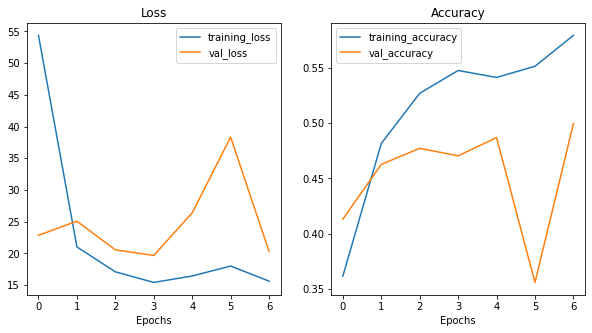

In [ ]:
# Fit the Models 
compile_model(resnet_model) 
fit_model(resnet_model,'resnet50') 

In [ ]:
# See checkpoint
compile_model(mobilenet_model)
fit_model(mobilenet_model,'mobilenet') 

Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/mobilenet/20220813-071635
Epoch 1/100
140/140 [==============================] - ETA: 0s - loss: 1.5513 - accuracy: 0.4622
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 12s 56ms/step - loss: 1.5513 - accuracy: 0.4622 - val_loss: 1.3287 - val_accuracy: 0.5462
Epoch 2/100
139/140 [============================>.] - ETA: 0s - loss: 1.1725 - accuracy: 0.6115
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 7s 48ms/step - loss: 1.1734 - accuracy: 0.6108 - val_loss: 1.2118 - val_accuracy: 0.5879
Epoch 3/100
140/140 [==============================] - ETA: 0s - loss: 1.0492 - accuracy: 0.6575
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_wei

AttributeError: ignored

<Figure size 720x360 with 0 Axes>

Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/sequential/20220813-074010
Epoch 1/100
140/140 [==============================] - ETA: 0s - loss: 1.6022 - accuracy: 0.5194
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 16s 96ms/step - loss: 1.6022 - accuracy: 0.5194 - val_loss: 1.2439 - val_accuracy: 0.5821
Epoch 2/100
139/140 [============================>.] - ETA: 0s - loss: 0.9456 - accuracy: 0.6960
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 12s 89ms/step - loss: 0.9447 - accuracy: 0.6963 - val_loss: 1.0266 - val_accuracy: 0.6793
Epoch 3/100
139/140 [============================>.] - ETA: 0s - loss: 0.6137 - accuracy: 0.8055
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_w

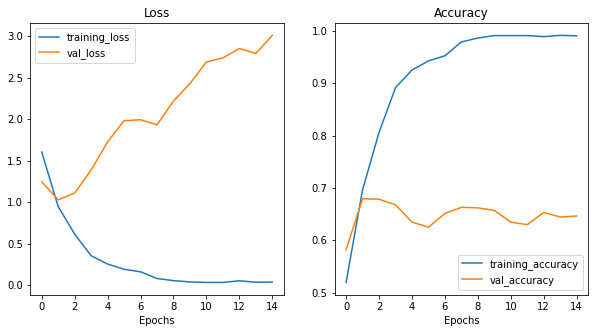

In [ ]:
compile_model(seq_model) 
fit_model(seq_model,'sequential') 

Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/conv_model_3/20220813-074740
Epoch 1/100
140/140 [==============================] - ETA: 0s - loss: 1.6910 - accuracy: 0.4279
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 7s 46ms/step - loss: 1.6910 - accuracy: 0.4279 - val_loss: 1.4974 - val_accuracy: 0.4956
Epoch 2/100
139/140 [============================>.] - ETA: 0s - loss: 1.2217 - accuracy: 0.5852
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 6s 43ms/step - loss: 1.2209 - accuracy: 0.5853 - val_loss: 1.1836 - val_accuracy: 0.6045
Epoch 3/100
139/140 [============================>.] - ETA: 0s - loss: 1.0377 - accuracy: 0.6477
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_w

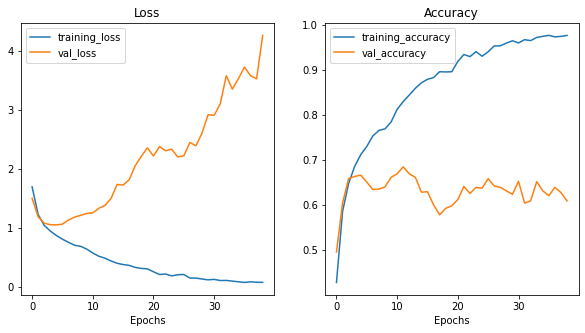

In [ ]:
compile_model(conv_model_3)         
fit_model(conv_model_3,'conv_model_3')

In [ ]:
val_data : goes up indicates its overfitting and thus data not generalizin 

In [ ]:
# Transfer learning with Tensorflow -feature extraction                           

After experimentation it is found that:
* conv_model_3 has performed better for lesser number of epochs (12).
* Mobilenet has performed well at epoch range of 39-43

https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5 

feature vector: https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5 

Hence it is found that the basic model has performed well. 


## Fine Tuning the Model 

### Overfitting 
training accuracy-increasing linearly over time and validation accuracy is around 65%. <br>
Steps:
* Data augmentaion
* Dropout regularization 

Resources:
* https://towardsdatascience.com/deep-learning-unbalanced-training-data-solve-it-like-this-6c528e9efea6 



In [ ]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers 
from keras.models import Sequential    
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub
import datetime   

In [ ]:
# Data augmentation

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal',
                          input_shape=(224,224,3)),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2)
    ]
) 
conv_model_a = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(filters =32,
                  kernel_size=(3,3),
                  strides =(1,1),
                  input_shape=(224,224,3),
                  padding='valid',
                  activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters =32,
                  kernel_size=(3,3),
                  strides =(1,1),
                  padding='valid',
                  activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters =64,
                  kernel_size=(3,3),
                  strides =(1,1),
                  padding='valid',
                  activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters =16,
                  kernel_size=(3,3),
                  strides =(1,1),
                  padding='valid',
                  activation='relu'), 
    layers.MaxPool2D(),
    layers.Flatten(),                 
    layers.Dense(num_classes, activation='softmax')
])      

Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/conv_model_a/20220818-144328
Epoch 1/100
140/140 [==============================] - ETA: 0s - loss: 1.9154 - accuracy: 0.3336
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 7s 47ms/step - loss: 1.9154 - accuracy: 0.3336 - val_loss: 1.5933 - val_accuracy: 0.4772
Epoch 2/100
140/140 [==============================] - ETA: 0s - loss: 1.3789 - accuracy: 0.5380
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 6s 45ms/step - loss: 1.3789 - accuracy: 0.5380 - val_loss: 1.2950 - val_accuracy: 0.5646
Epoch 3/100
140/140 [==============================] - ETA: 0s - loss: 1.2155 - accuracy: 0.5837
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_w

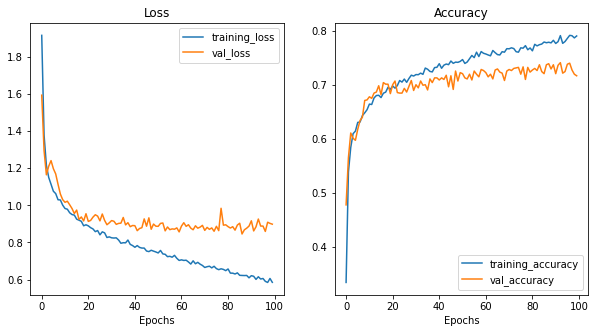

In [ ]:
conv_model_a.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=['accuracy'])

c_history=conv_model_a.fit(train_ds,
              epochs=100,
              steps_per_epoch = len(train_ds), 
              validation_data=test_ds,          
              validation_steps=len(test_ds),
              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',

                                                      experiment_name='conv_model_a')]) 

plot_loss_curves(c_history)  

<pre>There is no signficant raise due to change in learning rate 0.0005. Improvement in the preformance is observed. 
The model is further inspected for different learning rates for fine tuning. </pre>

In [ ]:
folder_path = '/content/drive/MyDrive/Projects/weather_recognition/final_models/' 
conv_model_a.save(folder_path+ 'models/conv_model_a.h5')

In [ ]:
from keras.models import load_model
conv_model_a = load_model(folder_path+ 'models/conv_model_a.h5')

In [ ]:
conv_model_a.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.000346),
                metrics=['accuracy'])

c_history_f=conv_model_a.fit(train_ds,
              epochs=50,
              steps_per_epoch = len(train_ds),
              validation_data=test_ds,
              validation_steps=len(test_ds),
              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',

                                                      experiment_name='e_a_f')]) 


Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/final_models/tensorflow_hub/e_a_f/20220818-151116
Epoch 1/50
139/140 [============================>.] - ETA: 0s - loss: 0.5838 - accuracy: 0.7950
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/final_models/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 9s 48ms/step - loss: 0.5829 - accuracy: 0.7951 - val_loss: 0.8729 - val_accuracy: 0.7269
Epoch 2/50
139/140 [============================>.] - ETA: 0s - loss: 0.5691 - accuracy: 0.7988
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/final_models/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 6s 45ms/step - loss: 0.5683 - accuracy: 0.7989 - val_loss: 0.8836 - val_accuracy: 0.7269
Epoch 3/50
139/140 [============================>.] - ETA: 0s - loss: 0.5631 - accuracy: 0.7970
Epoch 3: saving model to /content/drive/MyDrive/Projects/weat

There is no signficant raise due to change in learning rate 0.000346

In [ ]:
# Optimizing the model
conv_model_a.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

c_history_f=conv_model_a.fit(train_ds,
              epochs=50, 
              steps_per_epoch = len(train_ds), 
              validation_data=test_ds,                     
              validation_steps=len(test_ds), 
              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                      experiment_name='e_b')])

In [ ]:
folder_path = '/content/drive/MyDrive/Projects/weather_recognition/final_models/' 

In [ ]:
# conv_model_a.save(folder_path+ 'models/conv_model_a.h5')

* The conv_model_a is loaded and once again tuned for 50 more epochs and saved as conv_model_b with accuracy around 73%. 
* conv_model_b is further tuned for 45 more epochs to increase the validation accuracy to 76% and saved as conv_model_c.

In [ ]:
# Load the saved model
from keras.models import load_model
new_model = load_model(folder_path+ 'models/conv_model_a.h5') 

In [ ]:
c_history_2 = new_model.fit(train_ds,
              epochs=50,
              steps_per_epoch = len(train_ds),
              validation_data=test_ds,
              validation_steps=len(test_ds),
              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',

                                                      experiment_name='conv_model_b')])


Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/conv_model_b/20220814-102220
Epoch 1/50
140/140 [==============================] - ETA: 0s - loss: 0.8208 - accuracy: 0.7135
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 612s 4s/step - loss: 0.8208 - accuracy: 0.7135 - val_loss: 0.9294 - val_accuracy: 0.6822
Epoch 2/50
140/140 [==============================] - ETA: 0s - loss: 0.7941 - accuracy: 0.7281
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 6s 45ms/step - loss: 0.7941 - accuracy: 0.7281 - val_loss: 0.9544 - val_accuracy: 0.6812
Epoch 3/50
140/140 [==============================] - ETA: 0s - loss: 0.8069 - accuracy: 0.7254
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weig

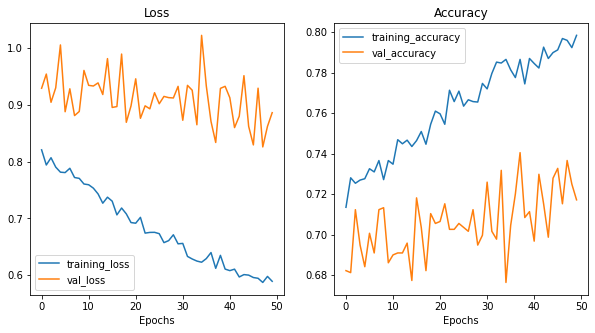

In [ ]:
plot_loss_curves(c_history_2) 

In [ ]:
new_model.save(folder_path+ 'models/conv_model_b.h5')

In [ ]:
c_history_3 = new_model.fit(train_ds,
              epochs=50,
              steps_per_epoch = len(train_ds),
              validation_data=test_ds,
              validation_steps=len(test_ds), 
              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',

                                                      experiment_name='conv_model_c')])

Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/conv_model_c/20220814-104320
Epoch 1/50
139/140 [============================>.] - ETA: 0s - loss: 0.5695 - accuracy: 0.8040
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 6s 46ms/step - loss: 0.5695 - accuracy: 0.8039 - val_loss: 0.9445 - val_accuracy: 0.6958
Epoch 2/50
139/140 [============================>.] - ETA: 0s - loss: 0.5721 - accuracy: 0.8008
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 7s 47ms/step - loss: 0.5716 - accuracy: 0.8007 - val_loss: 0.8383 - val_accuracy: 0.7357
Epoch 3/50
140/140 [==============================] - ETA: 0s - loss: 0.5608 - accuracy: 0.8045
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weig

In [ ]:
new_model.save(folder_path+ 'models/conv_model_c.h5')

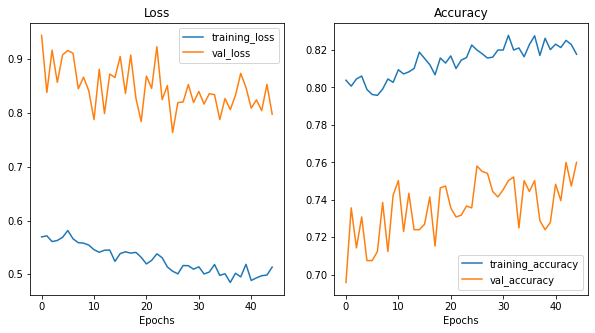

In [ ]:
plot_loss_curves(c_history_3)              

conv_model_c has performed better and is saved. 

In [ ]:
folder_path = '/content/drive/MyDrive/Projects/weather_recognition/' 

### Fine Tuning:

* conv_model_c is loaded and fine tuned for 24 epochs ( stopped by early stopping callback) with learning rate of adam optimizer to be 0.0001. 
* We are able to achieve validation accuracy of 78%. 


In [ ]:
from keras.models import load_model
f_model = load_model(folder_path+ 'models/conv_model_c.h5') 

In [ ]:
f_model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

c_history_f=f_model.fit(train_ds,
              epochs=50,
              steps_per_epoch = len(train_ds),
              validation_data=test_ds,
              validation_steps=len(test_ds),
              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                      experiment_name='e_a_f')]) 


Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/e_a_f/20220821-124602
Epoch 1/50
140/140 [==============================] - ETA: 0s - loss: 0.4372 - accuracy: 0.8480
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 797s 5s/step - loss: 0.4372 - accuracy: 0.8480 - val_loss: 0.7691 - val_accuracy: 0.7755
Epoch 2/50
140/140 [==============================] - ETA: 0s - loss: 0.4118 - accuracy: 0.8574
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 6s 46ms/step - loss: 0.4118 - accuracy: 0.8574 - val_loss: 0.7739 - val_accuracy: 0.7658
Epoch 3/50
139/140 [============================>.] - ETA: 0s - loss: 0.4038 - accuracy: 0.8509
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/che

In [ ]:
f_model.save(folder_path+ 'models/f_model.h5') 

In [ ]:
# Making prediction with our model 
preds_probs = f_model.predict(val_ds, verbose=1) # set verbosity 

43/43 [==============================] - 53s 285ms/step


In [ ]:
len(preds_probs),preds_probs[0], len(preds_probs[0]), sum(preds_probs) 

(1372, array([1.0547820e-05, 6.0698858e-07, 4.5250071e-04, 4.5533828e-04,
        5.4832326e-06, 2.7306468e-16, 1.1332575e-05, 9.1283491e-12,
        9.8124528e-01, 3.9383303e-07, 1.7818531e-02], dtype=float32), 11, array([125.202065, 130.84483 , 126.70154 , 141.61548 , 105.74924 ,
         79.88122 ,  98.458015,  37.764126, 239.8193  , 124.05972 ,
        161.90405 ], dtype=float32))

In [ ]:
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10], len(pred_classes)      

(array([8, 0, 5, 0, 6, 3, 9, 9, 8, 8]), 1372)

In [ ]:
y_labels = []
image = []                              
for images, labels in val_ds.unbatch(): 
  image.append(images.numpy())
  y_labels.append(labels.numpy().argmax())            
len(y_labels) , y_labels[:10]           

(1372, [8, 3, 5, 0, 6, 6, 9, 9, 8, 8])

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
sk_accuracy = accuracy_score(y_true=y_labels,
                          y_pred = pred_classes)
sk_accuracy                                                     

0.7776967930029155

The test set has achieved 78% accuracy. 

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
class_names

['dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

## Results

### Confusion Matrix

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size) 

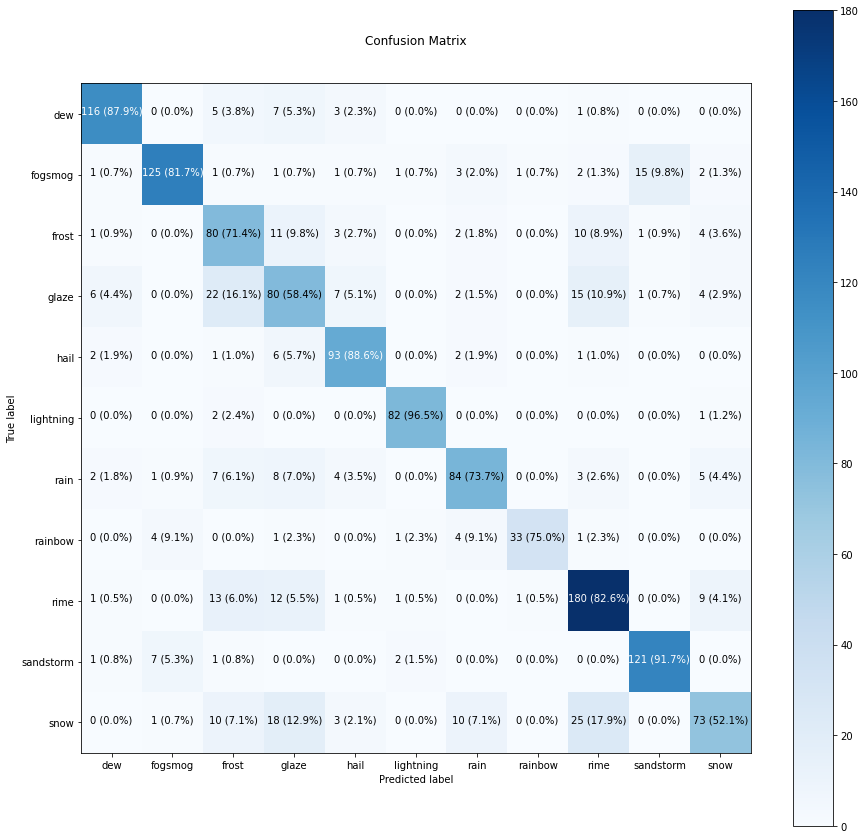

In [ ]:
make_confusion_matrix(y_true=y_labels, 
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

### Classification Report

In [ ]:
# target names wrong
from sklearn.metrics import classification_report                                    
print(classification_report(y_labels, pred_classes, target_names = class_names))

              precision    recall  f1-score   support

         dew       0.89      0.88      0.89       132
     fogsmog       0.91      0.82      0.86       153
       frost       0.56      0.71      0.63       112
       glaze       0.56      0.58      0.57       137
        hail       0.81      0.89      0.85       105
   lightning       0.94      0.96      0.95        85
        rain       0.79      0.74      0.76       114
     rainbow       0.94      0.75      0.84        44
        rime       0.76      0.83      0.79       218
   sandstorm       0.88      0.92      0.90       132
        snow       0.74      0.52      0.61       140

    accuracy                           0.78      1372
   macro avg       0.80      0.78      0.79      1372
weighted avg       0.78      0.78      0.78      1372



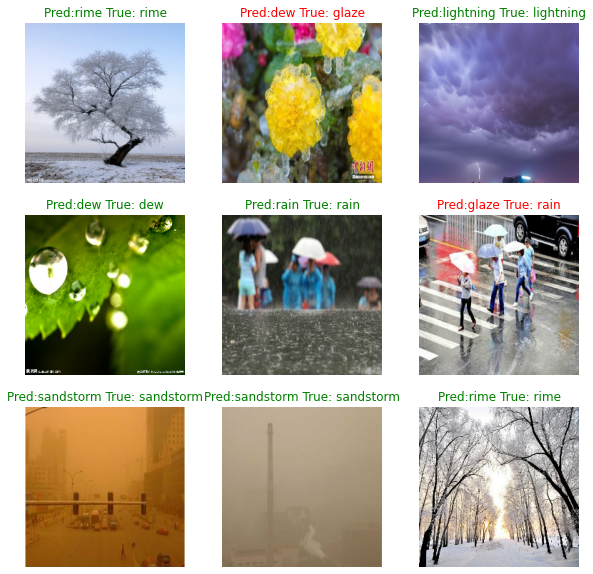

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  # plt.imshow(image[i].astype)
  plt.imshow(image[i].astype('uint8'))
  if pred_classes[i] == y_labels[i]:
    color = 'green'
  else:
    color = 'red'
  # plt.title(class_names[pred_classes[i]], color = color)
  plt.title("Pred:{} True: {}".format(class_names[pred_classes[i]],
                                       class_names[y_labels[i]]),
             color = color) 
  plt.axis("off")    

## Conclusion

This is the basic experimention of the weather dataset. We have done the follows:
* Explored the dataset
* Experimented with small amount of dataset for the choosing the model 
* Observed better performing models are chosen. 
* Dataset set is augmented, dropout regularization is applied fro better performance. 
* Different learning rate is experimented and default is chosen. 
* Transfer learning for mobilenet is also explored. 
* Sequential Model has given 86% training accuracy and 78% test accuracy. 
### Future Work
* The model can be further improved by increasing the augmentation, correcting the class imbalances in the dataset. 
* Different models can be explored.

<pre> Extras </pre>

In [ ]:
# Extra experimentation - change data augmentation and train for 200 epochs- with mobile net
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal',
                          input_shape=(180,180,3)),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2)
    ]
) 

mobilenet_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
feature_extraction_layer = hub.KerasLayer(mobilenet_url,
                                           trainable=False,
                                           name="feature_Extraction_layer",
                                           input_shape =IMG_SHAPE + (3,)) 
  
  # Create our own model
model = tf.keras.Sequential([  
      layers.Rescaling(1./255,input_shape=(224,224,3)),
      feature_extraction_layer,
      layers.Dense(num_classes, activation='softmax', name = 'output_layer')
  ]) 

Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/conv_model_x/20220815-073346
Epoch 1/100
140/140 [==============================] - ETA: 0s - loss: 2.0812 - accuracy: 0.2780
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 27s 49ms/step - loss: 2.0812 - accuracy: 0.2780 - val_loss: 1.8465 - val_accuracy: 0.3819
Epoch 2/100
140/140 [==============================] - ETA: 0s - loss: 1.7696 - accuracy: 0.4033
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 7s 47ms/step - loss: 1.7696 - accuracy: 0.4033 - val_loss: 1.5903 - val_accuracy: 0.4587
Epoch 3/100
140/140 [==============================] - ETA: 0s - loss: 1.5647 - accuracy: 0.4598
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_

## Transfer Learning Mobilenet

In [ ]:
### With data augmentation built in
import tensorflow as tf
from keras import layers
# from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2

# Build data augmentation layer
img_shape = (224,224,3)
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal',
                          input_shape=(224,224,3)),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2)
    ], name='data_augmentation'
)  

# Setup the input shape to our model
input_shape = (224, 224, 3)
  # Create our own model
base_model = MobileNetV2( (224,224,3),
                          include_top=False,
                           weights='imagenet') 

base_model.trainable = False

# Create new model at the top
inputs = keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(len(class_names),activation='softmax', name='output_layer')(x) 
model = keras.Model(inputs, outputs) 

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"]) 

c_history_5 = model.fit(train_ds,
              epochs=50,               
              steps_per_epoch = len(train_ds), 
              validation_data=test_ds,
              validation_steps=len(test_ds), 
              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                      experiment_name='mobilenetv2_t')])
                 

Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/mobilenetv2_t/20220817-112151
Epoch 1/50
140/140 [==============================] - ETA: 0s - loss: 1.6985 - accuracy: 0.4109
Epoch 1: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 660s 5s/step - loss: 1.6985 - accuracy: 0.4109 - val_loss: 1.5998 - val_accuracy: 0.4101
Epoch 2/50
139/140 [============================>.] - ETA: 0s - loss: 1.3232 - accuracy: 0.5441
Epoch 2: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 8s 56ms/step - loss: 1.3228 - accuracy: 0.5447 - val_loss: 1.4818 - val_accuracy: 0.4577
Epoch 3/50
139/140 [============================>.] - ETA: 0s - loss: 1.2200 - accuracy: 0.5843
Epoch 3: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_wei

In [ ]:
len(base_model.layers)

154

In [ ]:
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False 

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr = 0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"]) 

fine_tune_epochs = 20 
total_epochs = 50 + fine_tune_epochs
history_fine = model.fit(train_ds,
              epochs=total_epochs,  
              initial_epoch = c_history_5.epoch[-1],             
              steps_per_epoch = len(train_ds), 
              validation_data=test_ds,
              validation_steps=len(test_ds), 
              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                      experiment_name='mobilenetv2_t_f')])

Saving tensorBoard log files to: /content/drive/MyDrive/Projects/weather_recognition/tensorflow_hub/mobilenetv2_t_f/20220817-122957
Epoch 50/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


140/140 [==============================] - ETA: 0s - loss: 0.7524 - accuracy: 0.7447
Epoch 50: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 12s 63ms/step - loss: 0.7524 - accuracy: 0.7447 - val_loss: 1.2471 - val_accuracy: 0.5967
Epoch 51/70
139/140 [============================>.] - ETA: 0s - loss: 0.7442 - accuracy: 0.7455
Epoch 51: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 8s 56ms/step - loss: 0.7443 - accuracy: 0.7456 - val_loss: 1.2376 - val_accuracy: 0.6064
Epoch 52/70
140/140 [==============================] - ETA: 0s - loss: 0.7604 - accuracy: 0.7427
Epoch 52: saving model to /content/drive/MyDrive/Projects/weather_recognition/checkpoints_weights/checkpoint.ckpt
140/140 [==============================] - 8s 56ms/step - loss: 0.7604 - accuracy: 0.7427 - val_loss: 1.2408 - val